In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions


import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [4]:
x, y = make_moons(100, noise=0.25, random_state=2)

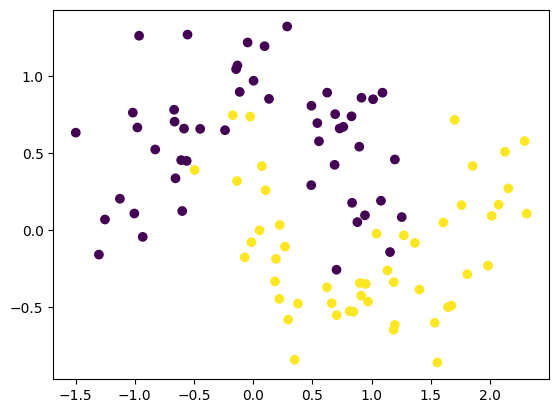

In [5]:
plt.scatter(x[:,0], x[:,1], c =y)

In [6]:
model_1 = Sequential()

In [7]:
model_1.add(Dense(128, input_dim = 2, activation='relu'))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

d:\DL(campus_x)\venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
adam = Adam(learning_rate=0.01)

model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history_1 = model_1.fit(x, y, epochs=500, validation_split=0.2, verbose=2)

Epoch 1/500
3/3 - 5s - 2s/step - accuracy: 0.8375 - loss: 0.6636 - val_accuracy: 0.9000 - val_loss: 0.6220
Epoch 2/500
3/3 - 0s - 34ms/step - accuracy: 0.8500 - loss: 0.6170 - val_accuracy: 0.9000 - val_loss: 0.5797
Epoch 3/500
3/3 - 0s - 36ms/step - accuracy: 0.8125 - loss: 0.5797 - val_accuracy: 0.9000 - val_loss: 0.5412
Epoch 4/500
3/3 - 0s - 33ms/step - accuracy: 0.8000 - loss: 0.5493 - val_accuracy: 0.9000 - val_loss: 0.5066
Epoch 5/500
3/3 - 0s - 31ms/step - accuracy: 0.8000 - loss: 0.5206 - val_accuracy: 0.9000 - val_loss: 0.4713
Epoch 6/500
3/3 - 0s - 32ms/step - accuracy: 0.8125 - loss: 0.4957 - val_accuracy: 0.9000 - val_loss: 0.4351
Epoch 7/500
3/3 - 0s - 31ms/step - accuracy: 0.8125 - loss: 0.4735 - val_accuracy: 0.9000 - val_loss: 0.4016
Epoch 8/500
3/3 - 0s - 32ms/step - accuracy: 0.8500 - loss: 0.4503 - val_accuracy: 0.9000 - val_loss: 0.3699
Epoch 9/500
3/3 - 0s - 28ms/step - accuracy: 0.8500 - loss: 0.4330 - val_accuracy: 0.9000 - val_loss: 0.3416
Epoch 10/500
3/3 - 0s

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 553us/step


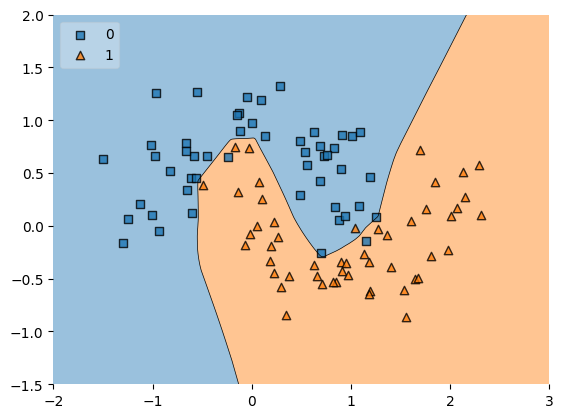

In [11]:
plot_decision_regions(x, y.astype('int'), clf=model_1, legend=2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()

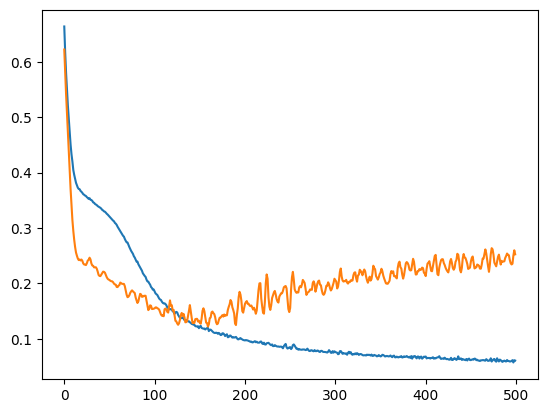

In [12]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])

After adding Regularization l2

In [13]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

d:\DL(campus_x)\venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(x, y, epochs=500, validation_split = 0.2,verbose=2)

Epoch 1/500
3/3 - 1s - 330ms/step - accuracy: 0.9250 - loss: 0.2609 - val_accuracy: 0.9500 - val_loss: 0.1824
Epoch 2/500
3/3 - 0s - 36ms/step - accuracy: 0.9125 - loss: 0.2499 - val_accuracy: 0.8500 - val_loss: 0.3678
Epoch 3/500
3/3 - 0s - 30ms/step - accuracy: 0.9125 - loss: 0.2386 - val_accuracy: 1.0000 - val_loss: 0.1407
Epoch 4/500
3/3 - 0s - 28ms/step - accuracy: 0.9000 - loss: 0.2539 - val_accuracy: 1.0000 - val_loss: 0.1215
Epoch 5/500
3/3 - 0s - 28ms/step - accuracy: 0.9250 - loss: 0.2326 - val_accuracy: 1.0000 - val_loss: 0.1351
Epoch 6/500
3/3 - 0s - 28ms/step - accuracy: 0.9375 - loss: 0.2060 - val_accuracy: 0.9500 - val_loss: 0.2268
Epoch 7/500
3/3 - 0s - 28ms/step - accuracy: 0.9625 - loss: 0.1996 - val_accuracy: 0.9500 - val_loss: 0.3023
Epoch 8/500
3/3 - 0s - 30ms/step - accuracy: 0.9000 - loss: 0.2258 - val_accuracy: 0.9000 - val_loss: 0.3031
Epoch 9/500
3/3 - 0s - 30ms/step - accuracy: 0.9250 - loss: 0.2096 - val_accuracy: 0.9500 - val_loss: 0.2219
Epoch 10/500
3/3 -

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 8s 830us/step


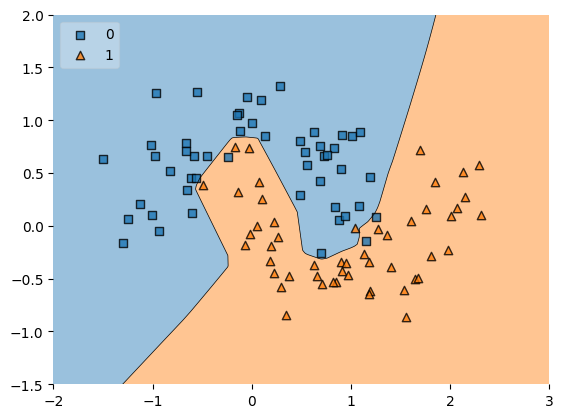

In [18]:
plot_decision_regions(x, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

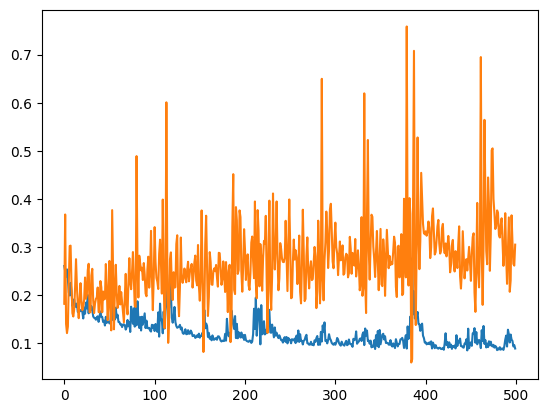

In [19]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])